In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from scipy.stats import chi2_contingency
warnings.filterwarnings("ignore")

/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


In [ ]:
df=pd.read_csv("D:\d drive\dai_assign\Sleep_health_and_lifestyle_dataset.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
df.shape

(374, 13)

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
df.isnull()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,False,False,False,False,False,False,False,False,False,False,False,False,False
370,False,False,False,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,False,False,False
372,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [7]:
df["Blood Pressure"].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [8]:
len(df["Blood Pressure"].unique())


25

In [9]:
df["Sleep Disorder"].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [10]:
len(df["Sleep Disorder"].unique())

3

In [11]:
df["Sleep Disorder"].isnull().sum()

219

AS IN A DATASET OF ONLY 374 ROWS , THE 219 ROWS ARE EMPTY SO NO NEED TO INCLUDE SUCH TYPE OF COLUMN

In [12]:
df.drop(columns="Sleep Disorder" , axis=1 ,inplace=True)

In [13]:
df.drop(columns="Person ID", axis =1, inplace=True)

In [14]:
df.corr(numeric_only=True)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


In [15]:
# Separate Categorical Columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_data = df[categorical_cols]
categorical_data

,Gender,Occupation,BMI Category,Blood Pressure
0,Male,Software Engineer,Overweight,126/83
1,Male,Doctor,Normal,125/80
2,Male,Doctor,Normal,125/80
3,Male,Sales Representative,Obese,140/90
4,Male,Sales Representative,Obese,140/90
...,...,...,...,...
369,Female,Nurse,Overweight,140/95
370,Female,Nurse,Overweight,140/95
371,Female,Nurse,Overweight,140/95
372,Female,Nurse,Overweight,140/95


In [16]:
# Separate Numerical Columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_data = df[numerical_cols]
numerical_data

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,27,6.1,6,42,6,77,4200
1,28,6.2,6,60,8,75,10000
2,28,6.2,6,60,8,75,10000
3,28,5.9,4,30,8,85,3000
4,28,5.9,4,30,8,85,3000
...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,68,7000
370,59,8.0,9,75,3,68,7000
371,59,8.1,9,75,3,68,7000
372,59,8.1,9,75,3,68,7000


In [17]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000


In [18]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [19]:
numerical_data.corr()['Quality of Sleep']

Age                        0.473734
Sleep Duration             0.883213
Quality of Sleep           1.000000
Physical Activity Level    0.192896
Stress Level              -0.898752
Heart Rate                -0.659865
Daily Steps                0.016791
Name: Quality of Sleep, dtype: float64

# **UNIVARIATE ANALYSIS**

**Histplot of numerical column**

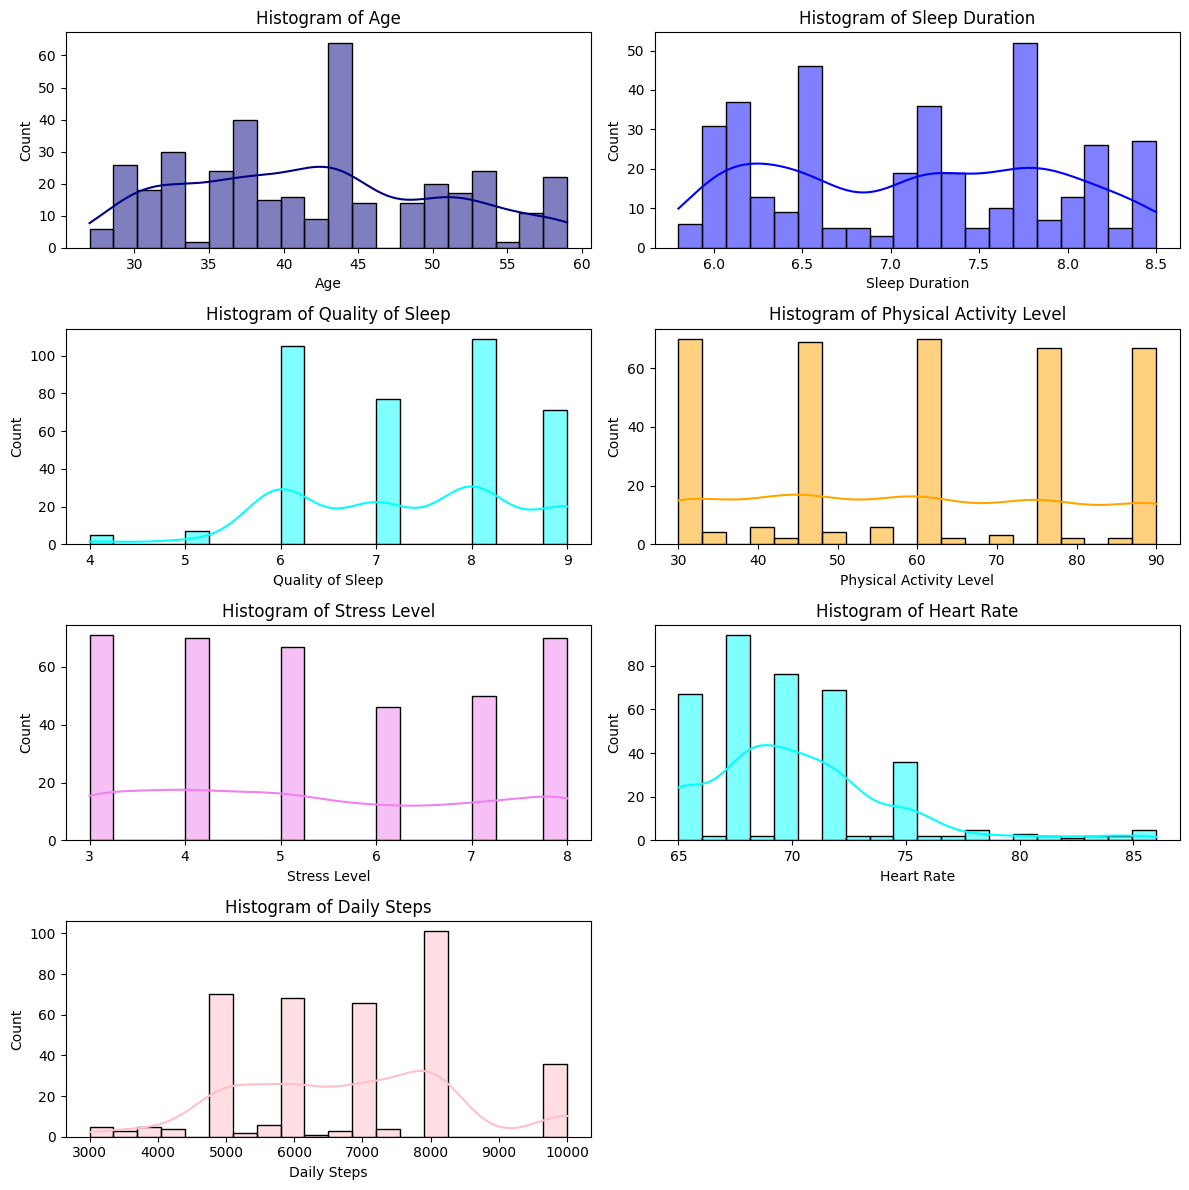

In [20]:
num_plots = len(numerical_cols)  # Count of numerical features
num_rows = math.ceil(num_plots / 2)  # Dynamic row count for 2 columns

plt.figure(figsize=(12, num_rows * 3))  # Adjust figure size
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 2, i)  # Dynamic subplots (rows x 2 columns)
    sns.histplot(df[col], kde=True, bins=20, color=np.random.choice(["orange","pink","violet","green","red","magenta", "blue","cyan","olive","navy","teal"]))
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()

**box plot  of numerical column**

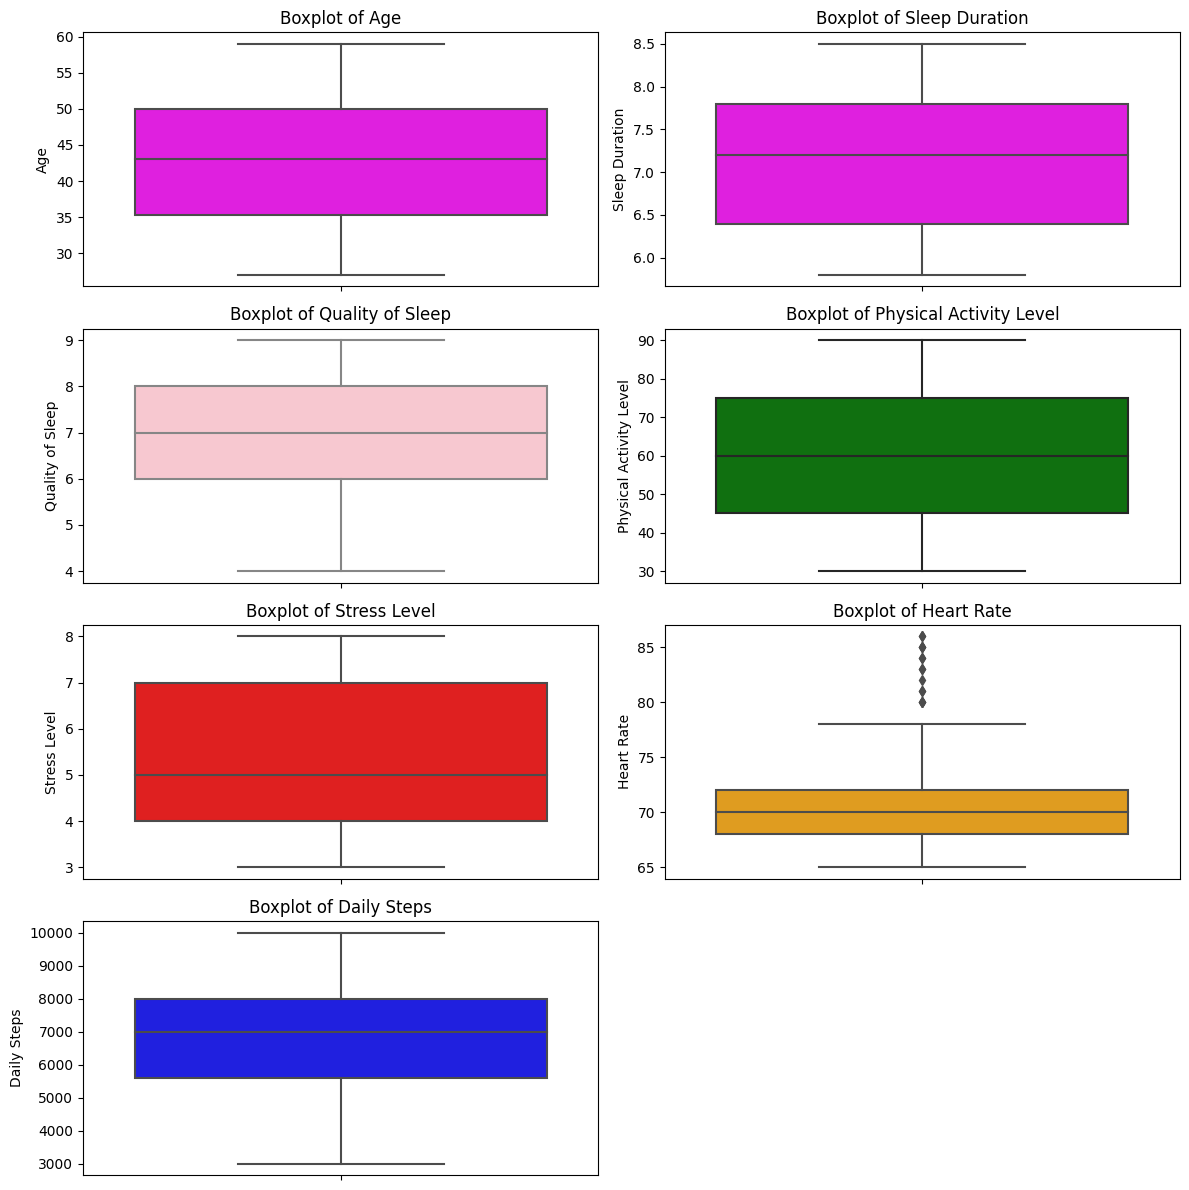

In [21]:
plt.figure(figsize=(12, num_rows * 3))  
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(y=df[col], color=np.random.choice(["orange","pink","violet","green","red","magenta", "blue","cyan","olive","navy","teal"]))
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

**kdeplot of numerical column**

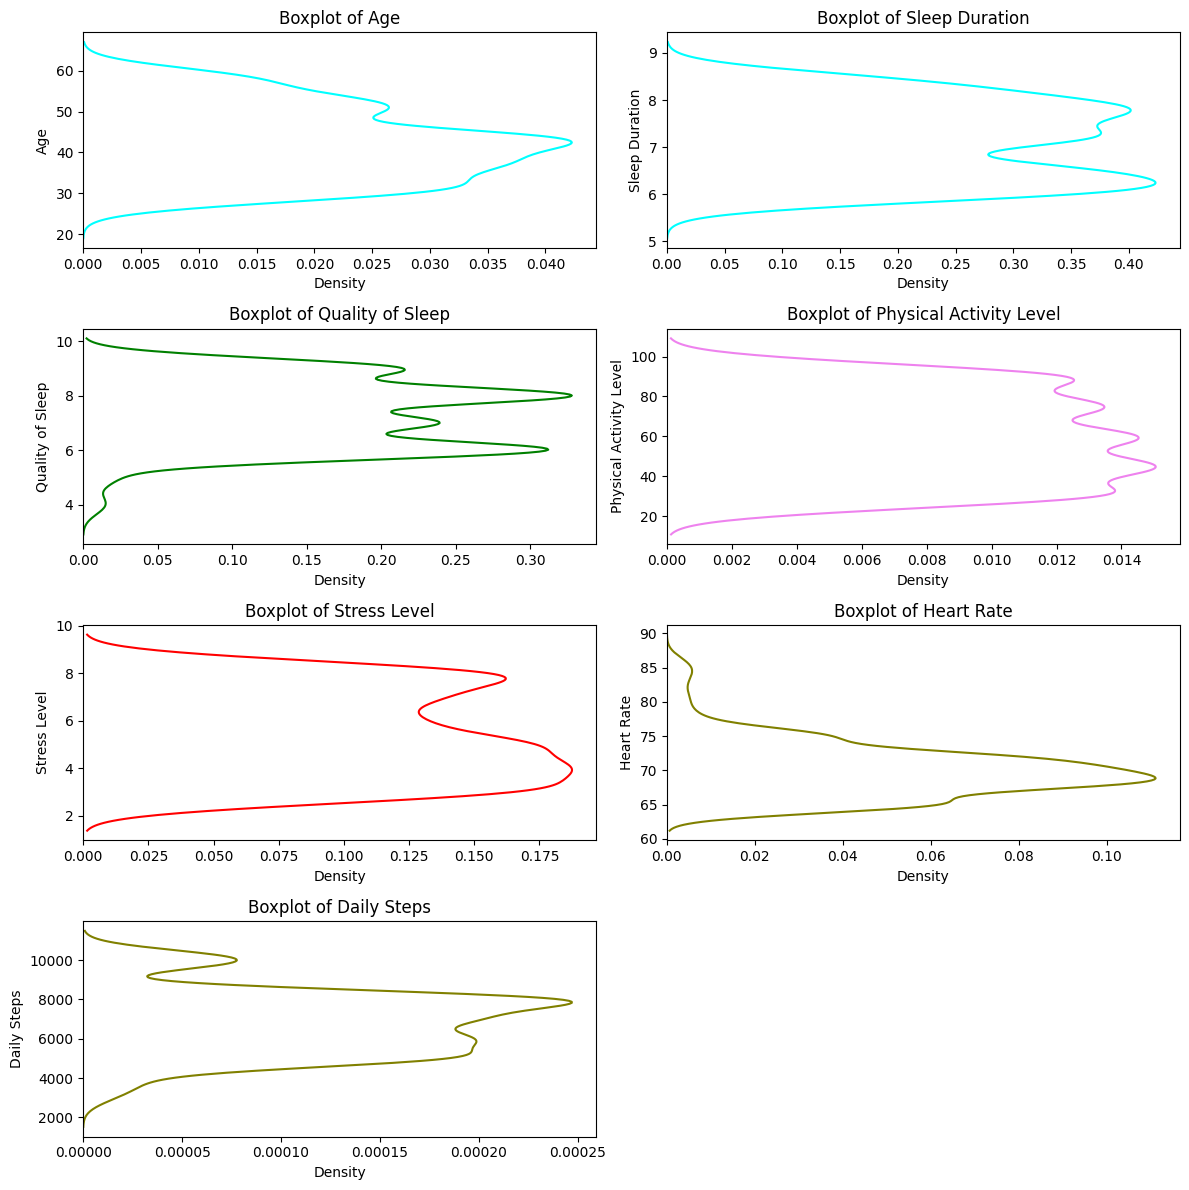

In [22]:
plt.figure(figsize=(12, num_rows * 3))  
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 2, i)
    sns.kdeplot(y=df[col], color=np.random.choice(["orange","pink","violet","green","red","magenta", "blue","cyan","olive","navy","teal"]))
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

**ecdfplot(Empirical Cumulative Distribution Function) of numerical column**

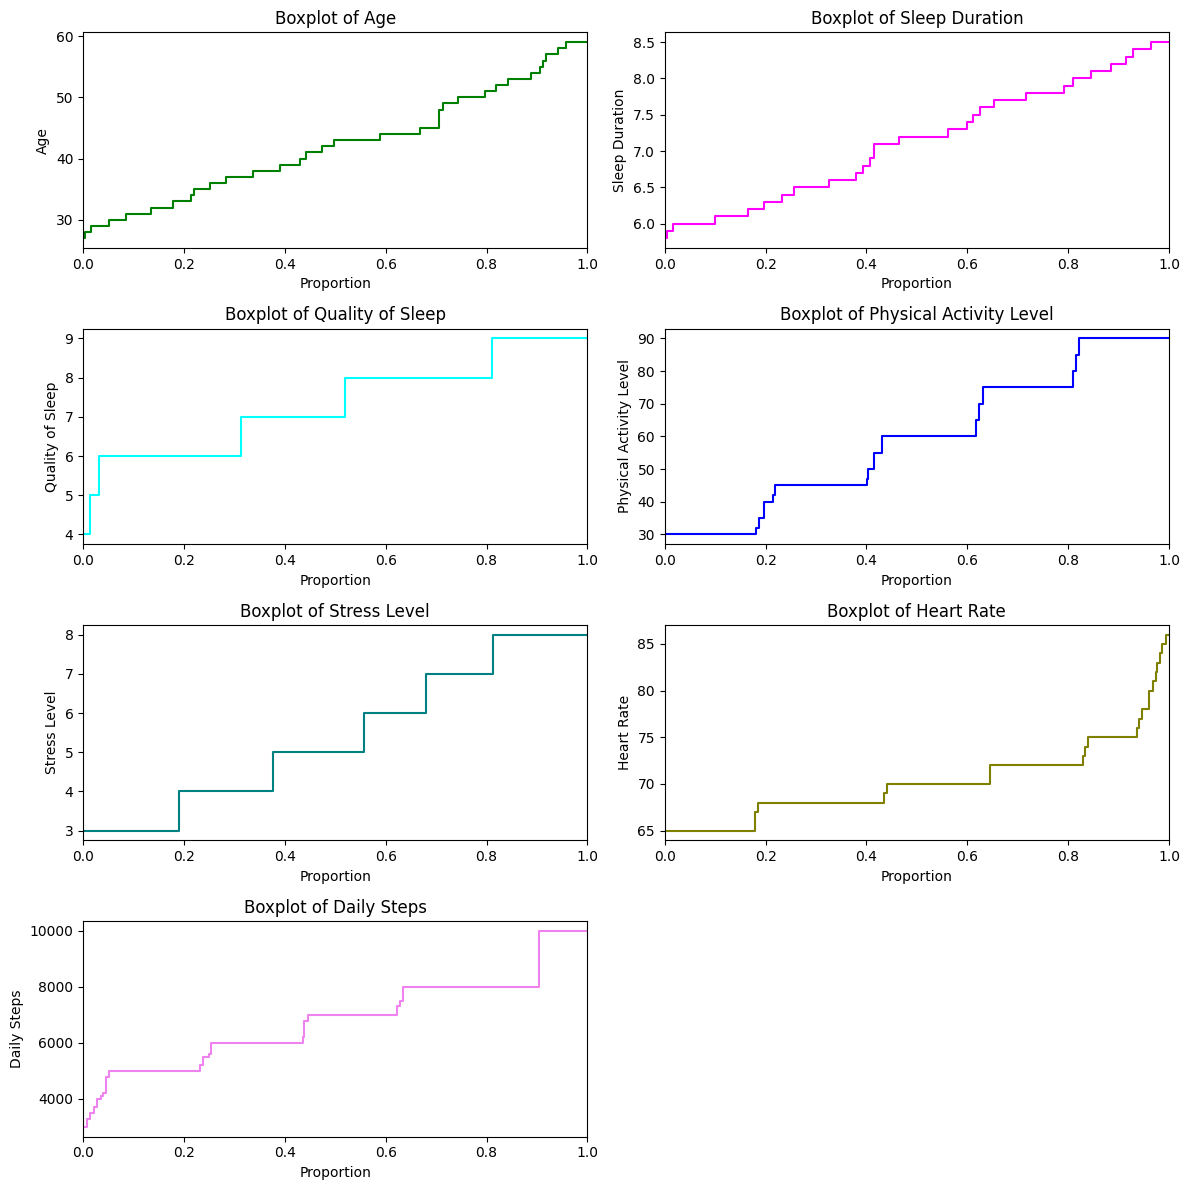

In [23]:
plt.figure(figsize=(12, num_rows * 3))  
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 2, i)
    sns.ecdfplot(y=df[col], color=np.random.choice(["orange","pink","violet","green","red","magenta", "blue","cyan","olive","navy","teal"]))
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

**countplot of categorical column**

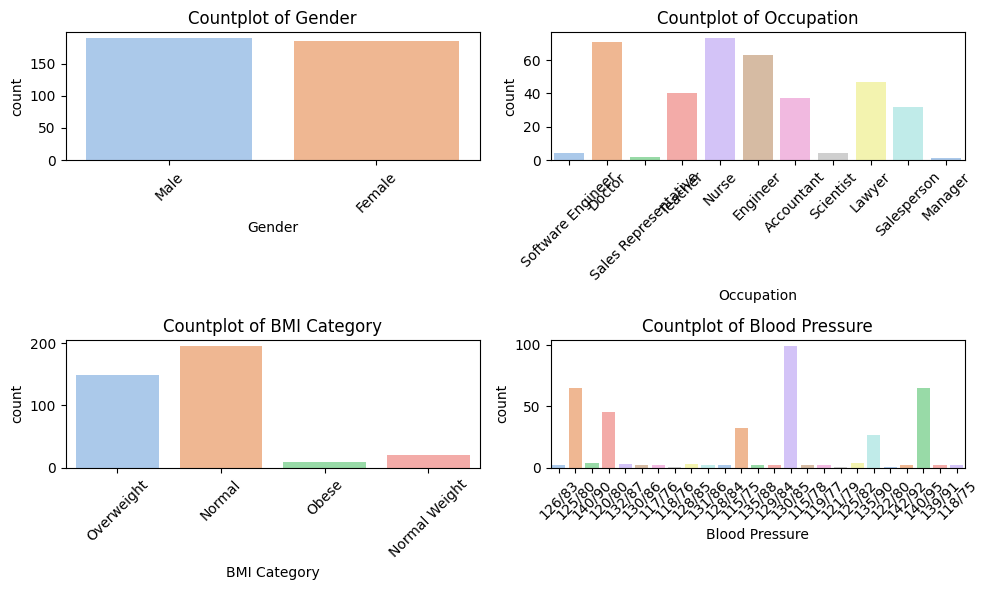

In [24]:
cat_plots = len(categorical_cols)  # Count of categorical features
cat_rows = math.ceil(cat_plots / 2)  # Dynamic row count

plt.figure(figsize=(10, cat_rows * 3))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(cat_rows, 2, i)  # Dynamic subplots (rows x 2 columns)
    sns.countplot(x=df[col], palette="pastel")
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**piecharts of categorical column**

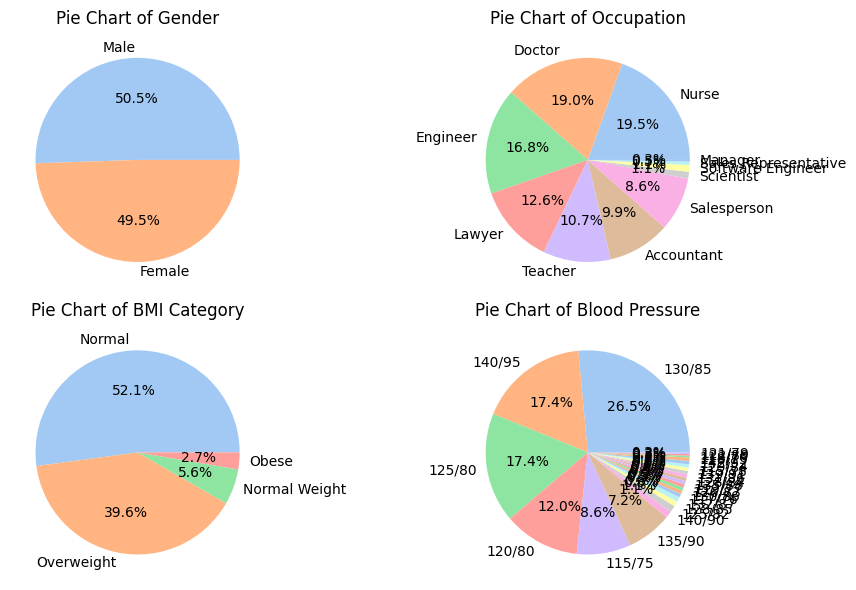

In [25]:
plt.figure(figsize=(10, cat_rows * 3))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(cat_rows, 2, i)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
    plt.title(f"Pie Chart of {col}")
    plt.ylabel('')  # Hide y-label for better visualization
plt.tight_layout()
plt.show()

**percentage distribution of categorical cols**

In [26]:
for i,col in enumerate(categorical_cols):
    print(df[col].value_counts(normalize=True) * 100)  # Percentage distribution
    print("\n")
    print("\n")

Gender
Male      50.534759
Female    49.465241
Name: proportion, dtype: float64




Occupation
Nurse                   19.518717
Doctor                  18.983957
Engineer                16.844920
Lawyer                  12.566845
Teacher                 10.695187
Accountant               9.893048
Salesperson              8.556150
Scientist                1.069519
Software Engineer        1.069519
Sales Representative     0.534759
Manager                  0.267380
Name: proportion, dtype: float64




BMI Category
Normal           52.139037
Overweight       39.572193
Normal Weight     5.614973
Obese             2.673797
Name: proportion, dtype: float64




Blood Pressure
130/85    26.470588
140/95    17.379679
125/80    17.379679
120/80    12.032086
115/75     8.556150
135/90     7.219251
140/90     1.069519
125/82     1.069519
128/85     0.802139
132/87     0.802139
117/76     0.534759
130/86     0.534759
126/83     0.534759
119/77     0.534759
135/88     0.534759
128/84     0.534759
1

**barplot of categorical cols with top three values**

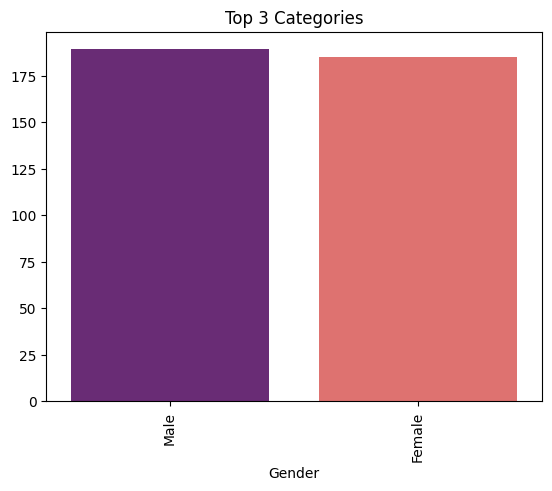

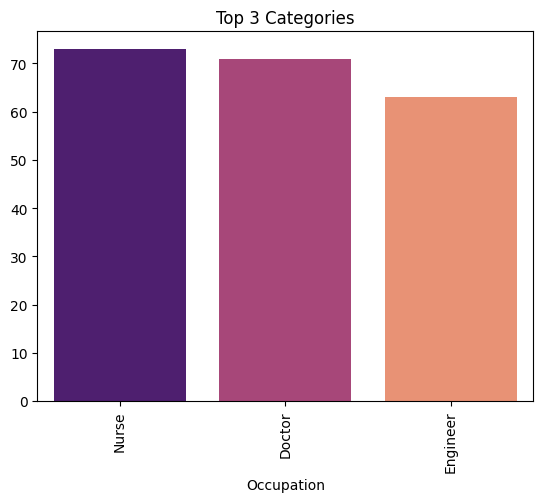

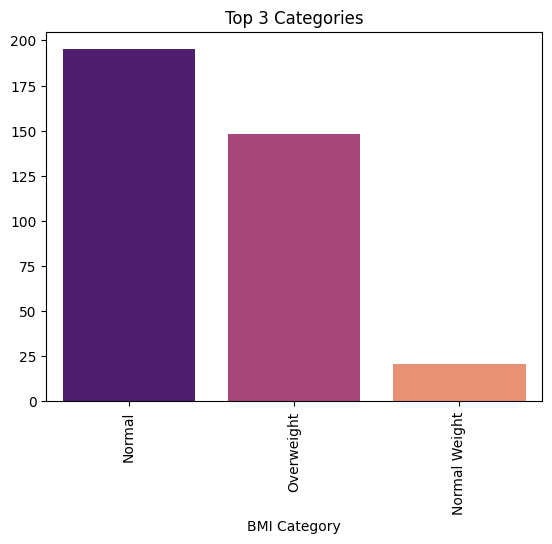

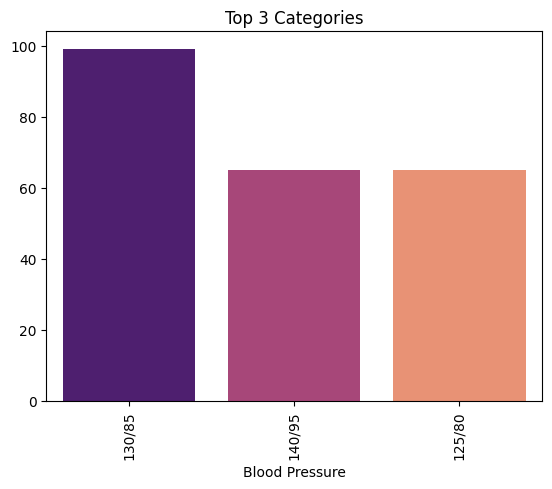

In [27]:
for i, col in enumerate(categorical_cols):
    top_10 = df[col].value_counts().nlargest(3)
    sns.barplot(x=top_10.index, y=top_10.values, palette="magma")
    plt.xticks(rotation=90)
    plt.title("Top 3 Categories")
    plt.show()

**countplot of categorical cols**

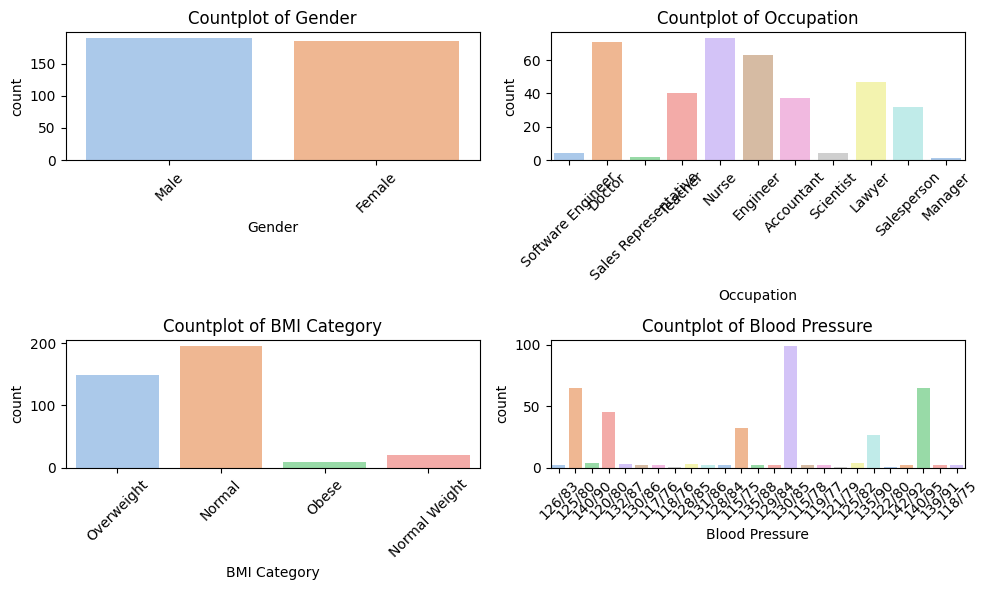

In [28]:
plt.figure(figsize=(10, cat_rows * 3))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(cat_rows, 2, i)  # Dynamic subplots (rows x 2 columns)
    sns.countplot(x=df[col], palette="pastel")
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **MULTIVARIATE ANALYSIS**

**barplot of categorical cols with quality of sleep(numeric V/s categorical analysis)**

A bar plot in a numerical vs categorical analysis shows the aggregate (mean, sum, etc.) of a numerical variable for each category of a categorical variable.

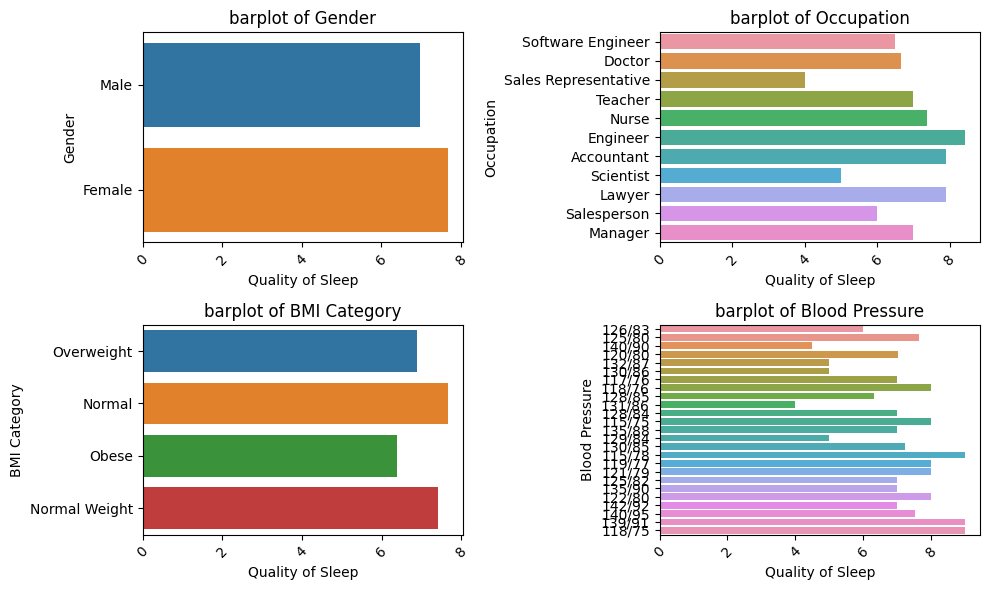

In [29]:
plt.figure(figsize=(10, cat_rows * 3))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(cat_rows, 2, i)  # Dynamic subplots (rows x 2 columns)
    sns.barplot(data=df ,x="Quality of Sleep" , y=col , ci=None)
    plt.title(f"barplot of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**heat map of numerical cols(numeric V/s numeric analysis)**

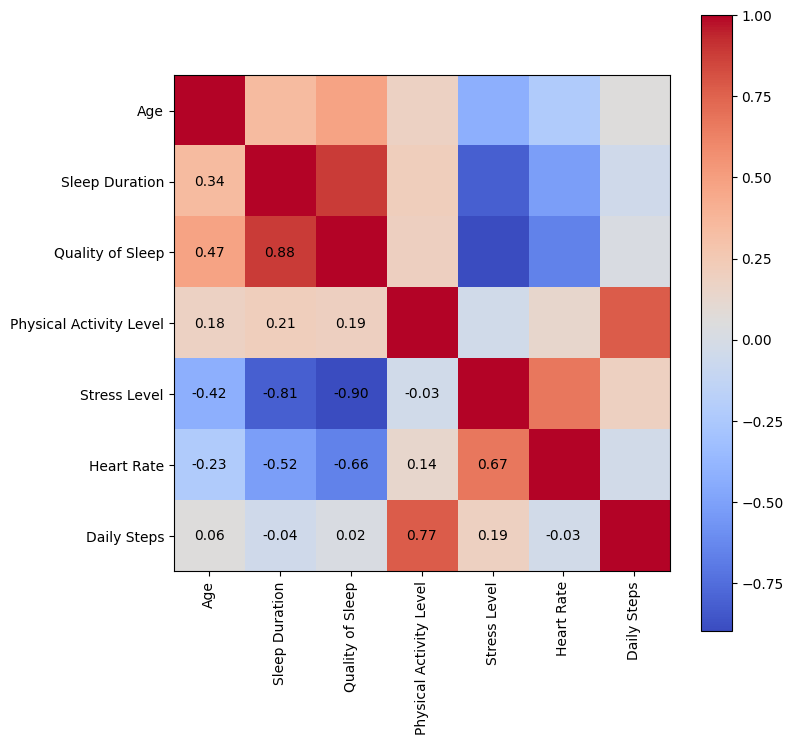

In [30]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8, 8))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr)):
    for j in range(len(corr)):
        if not mask[i, j]:
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()

**scatter plot between two numerical cols(numeric V/s numeric analysis)**

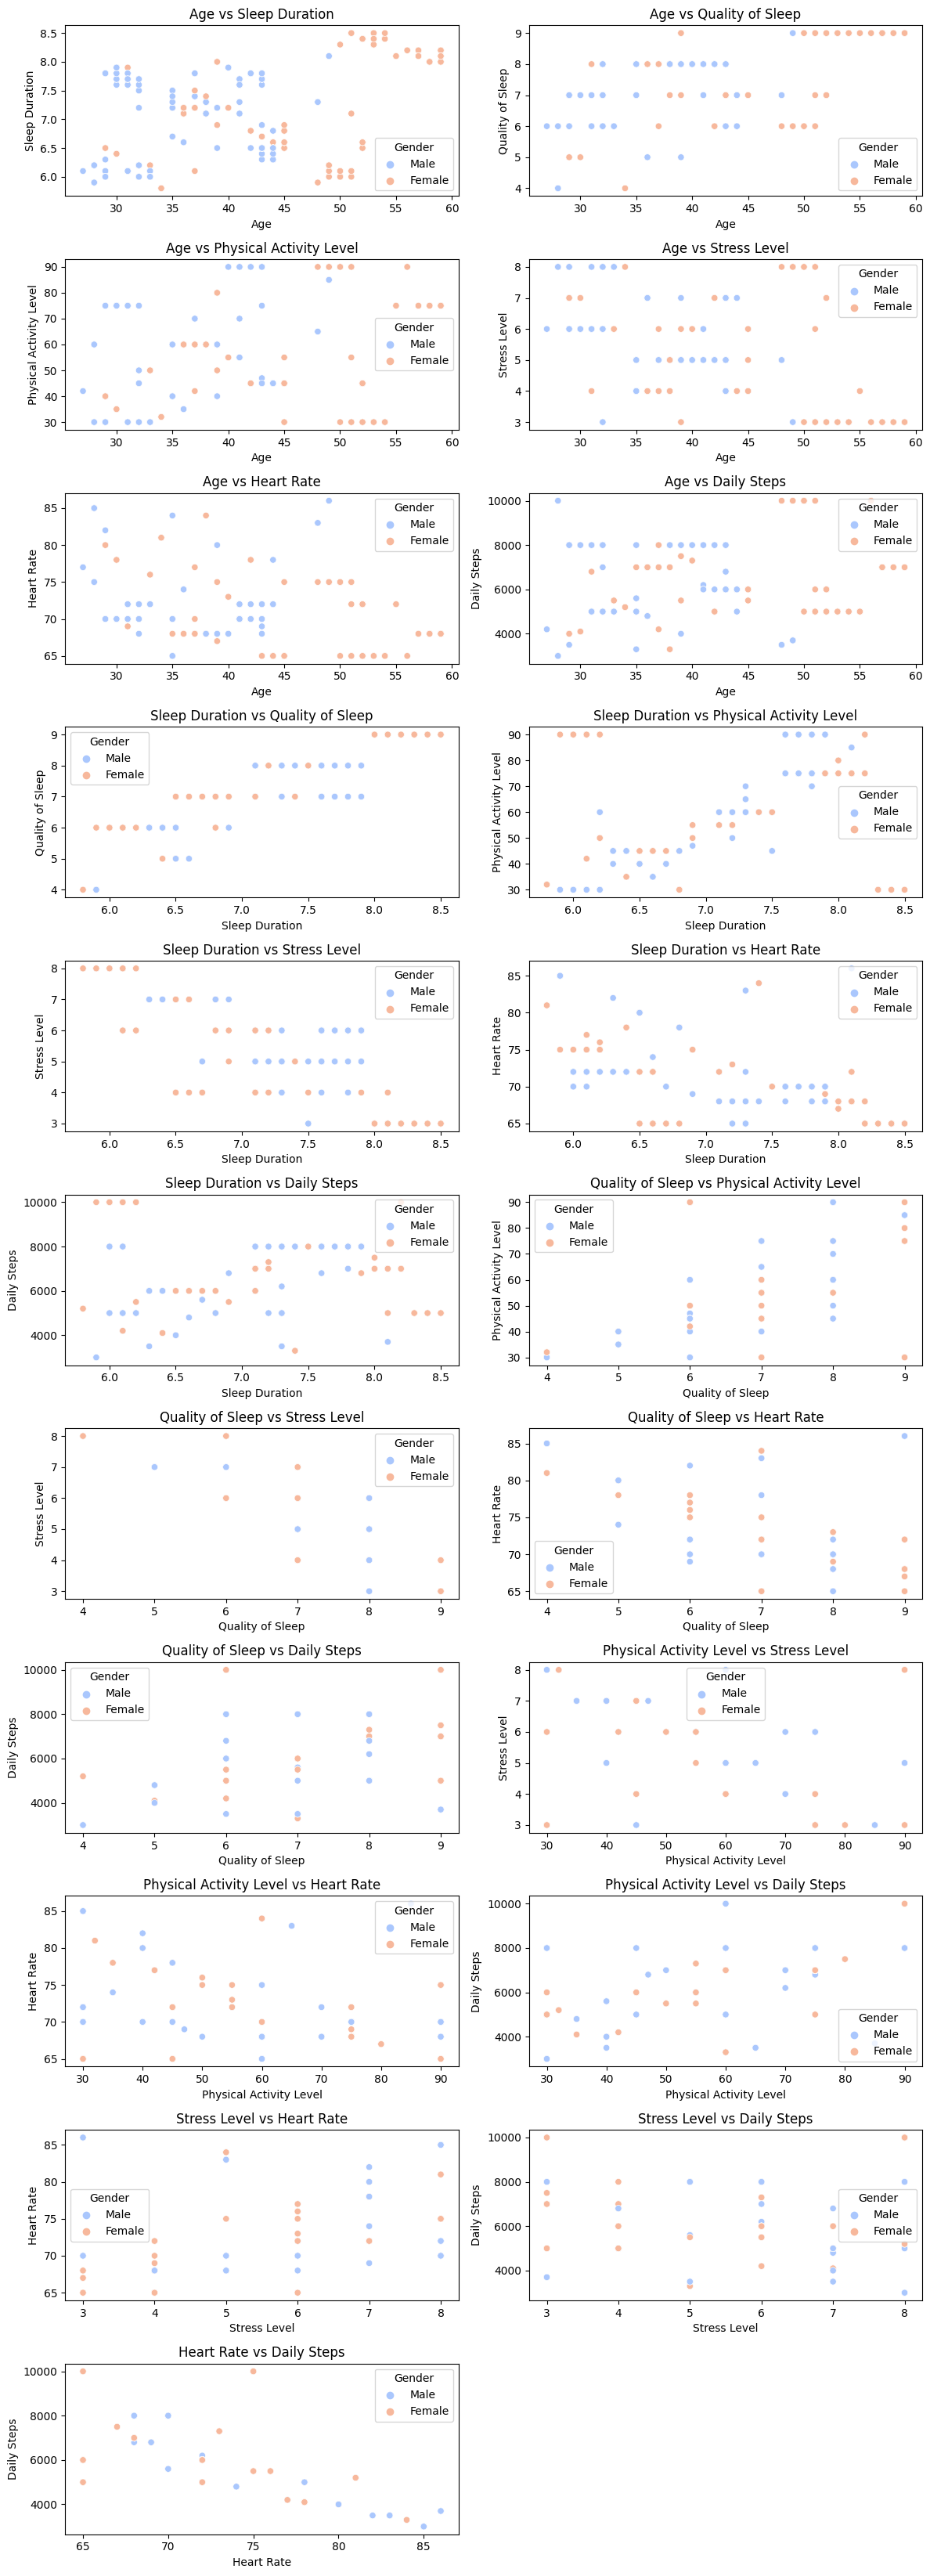

In [31]:
num_features = list(numerical_cols)
num_pairs = [(num_features[i], num_features[j]) for i in range(len(num_features)) for j in range(i+1, len(num_features))]

num_rows = math.ceil(len(num_pairs) / 2)

plt.figure(figsize=(12, num_rows * 3))
for i, (col1, col2) in enumerate(num_pairs, 1):
    plt.subplot(num_rows, 2, i)
    sns.scatterplot(x=df[col1], y=df[col2], hue=df[categorical_cols[0]], palette="coolwarm")
    plt.title(f"{col1} vs {col2}")
plt.tight_layout()
plt.show()

**pairplot between categorical cols where hue is the gender column(numeric V/s numeric analysis)**

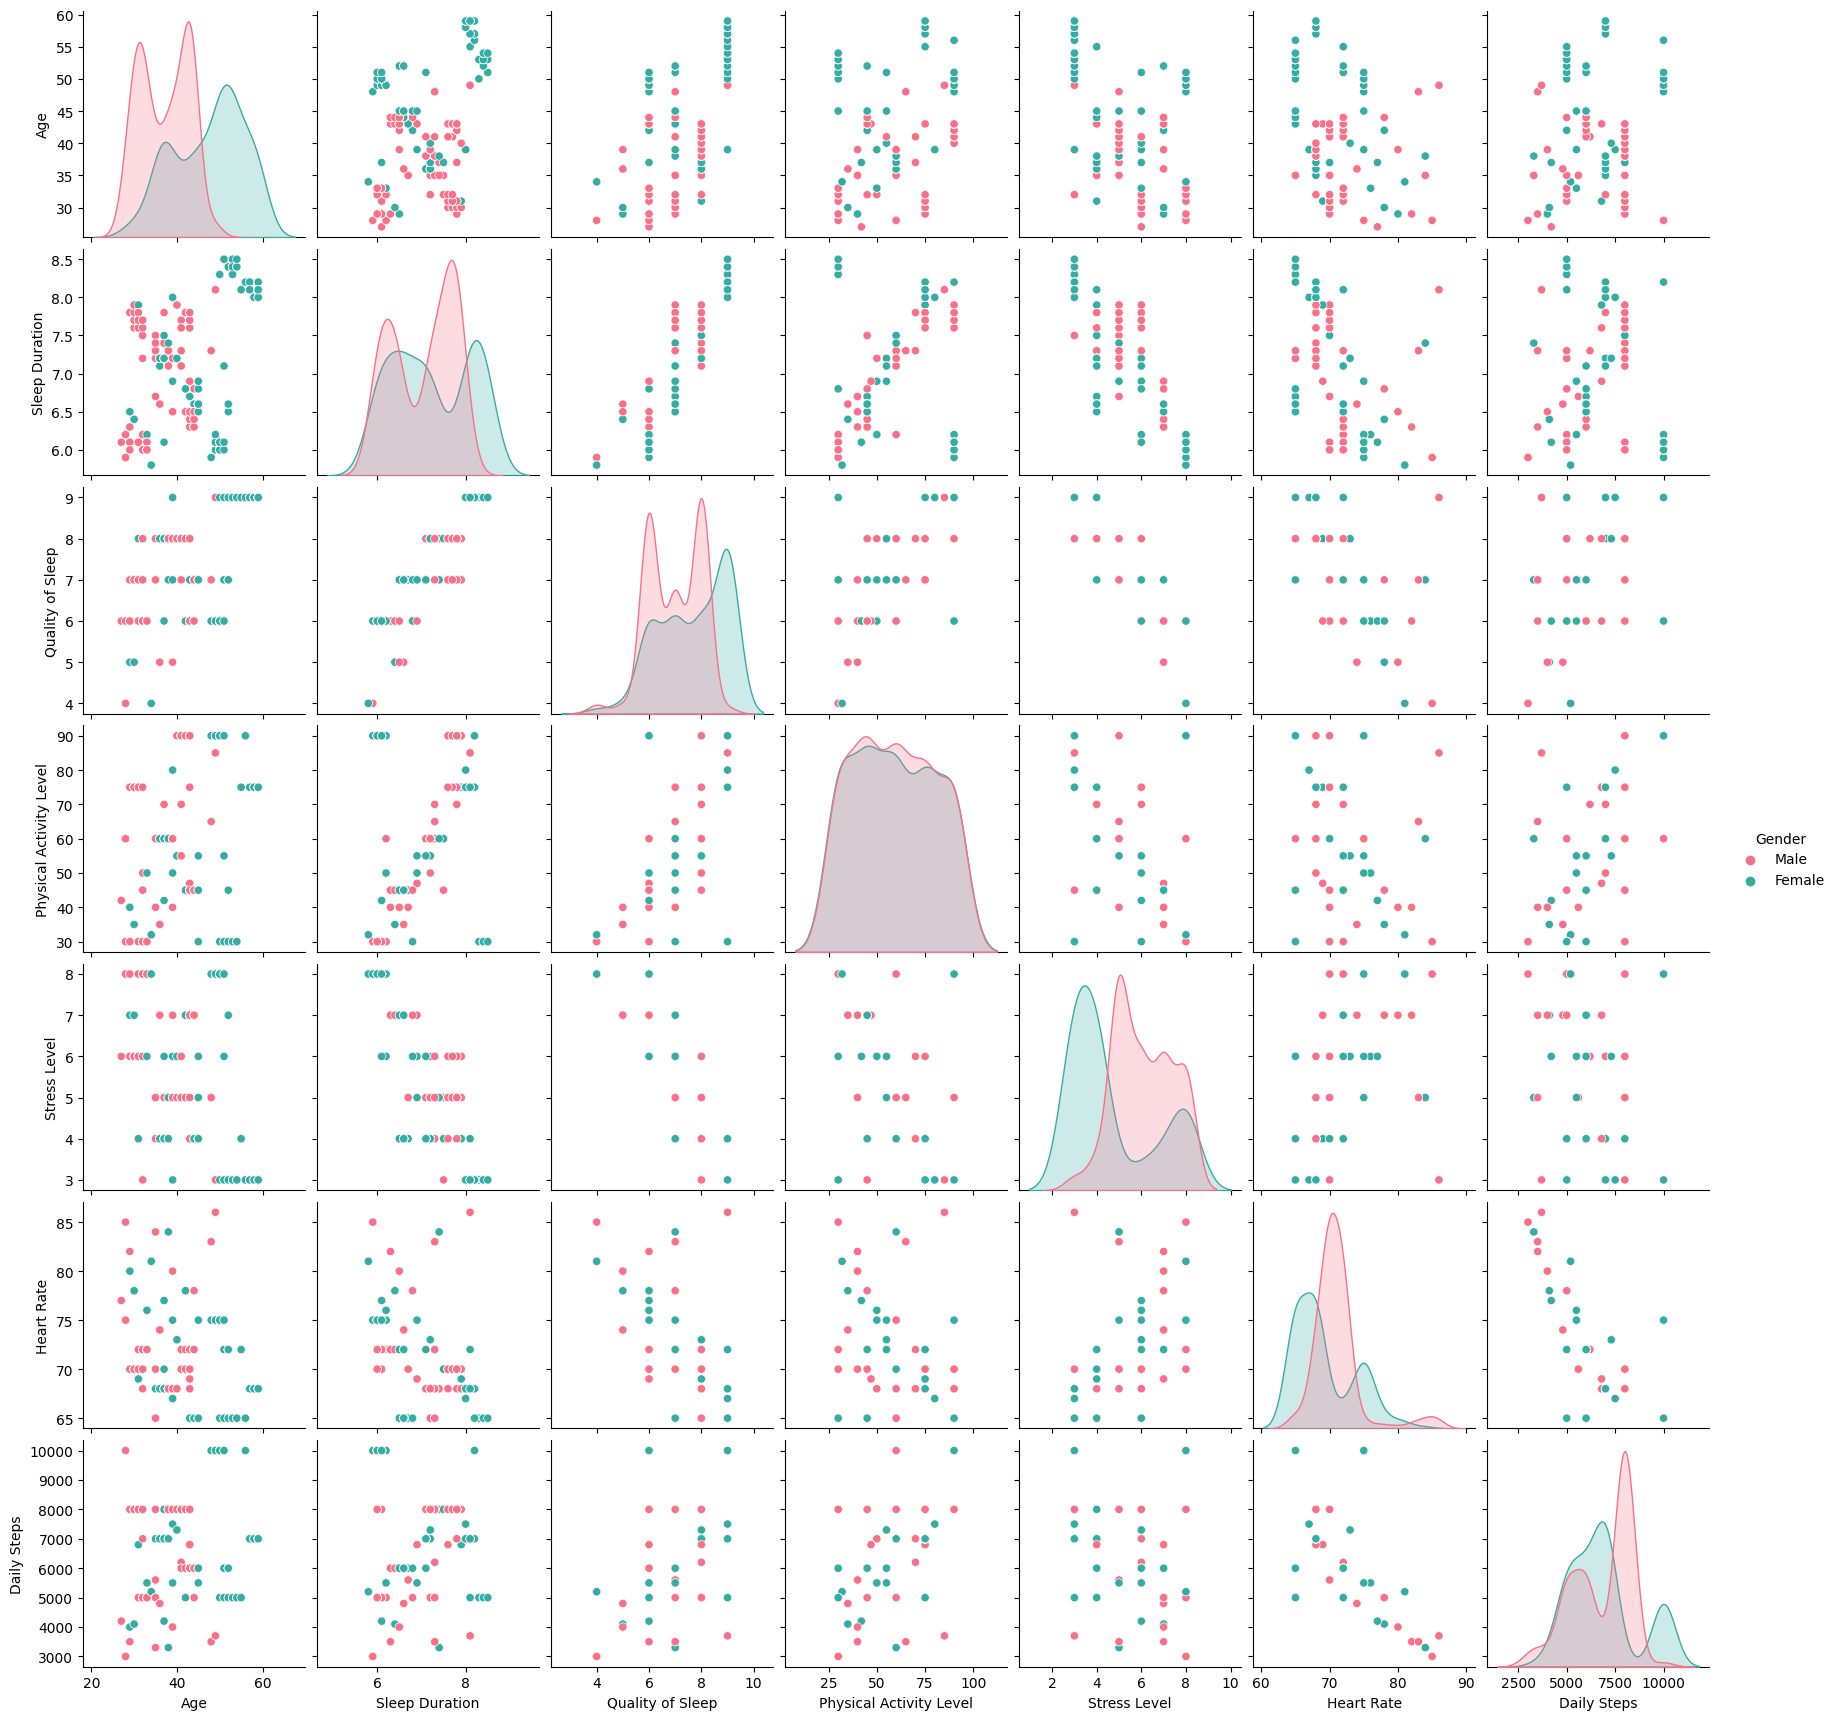

In [32]:
sns.pairplot(df, hue=categorical_cols[0], palette="husl")  # Uses first gender column as hue
plt.show()

**violinplot of numerical cols with quality of sleep(numeric V/s categorical analysis)**

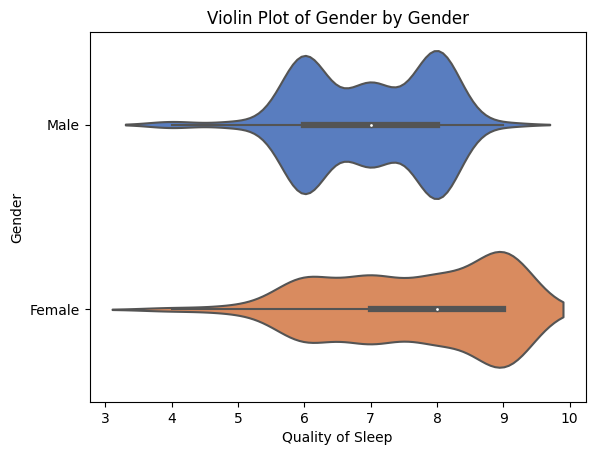

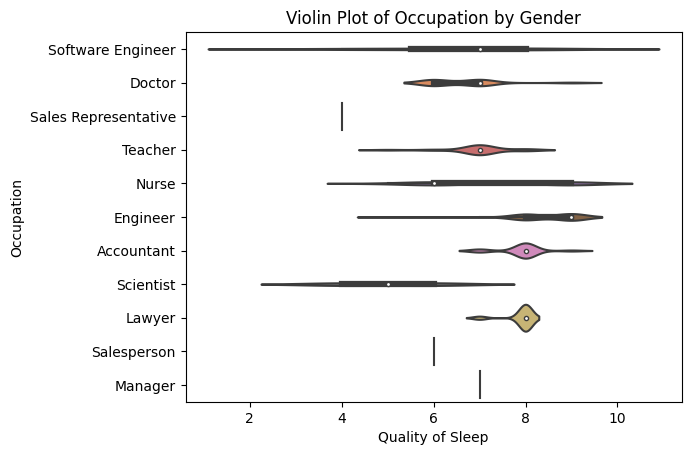

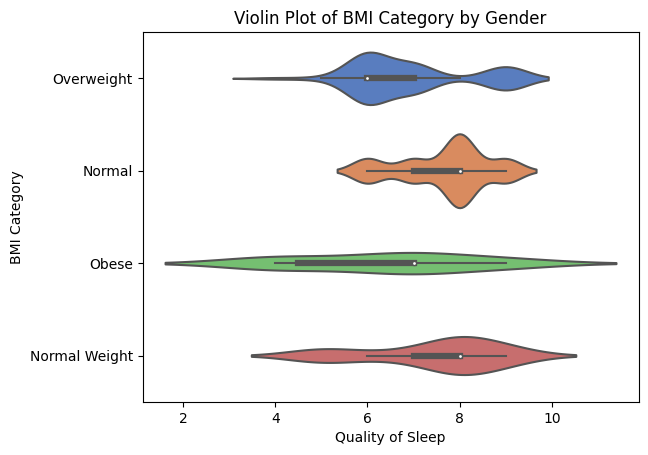

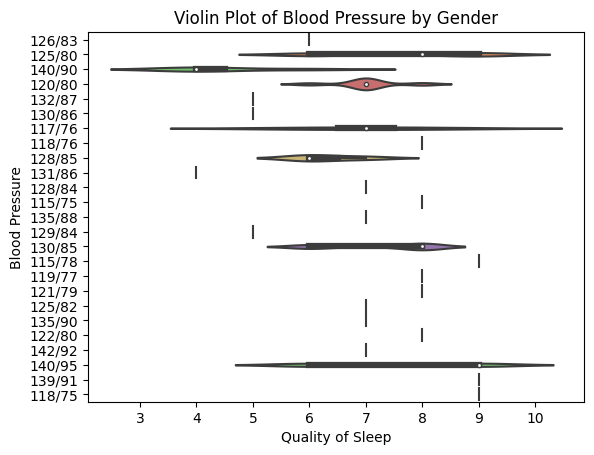

In [33]:
for i, col in enumerate(categorical_cols, 1):
    sns.violinplot(x=df["Quality of Sleep"], y=df[col], palette="muted")
    plt.title(f"Violin Plot of {col} by {categorical_cols[0]}")
    plt.show()

**boxplot of numerical cols with quality of sleep(numeric V/s categorical analysis)**

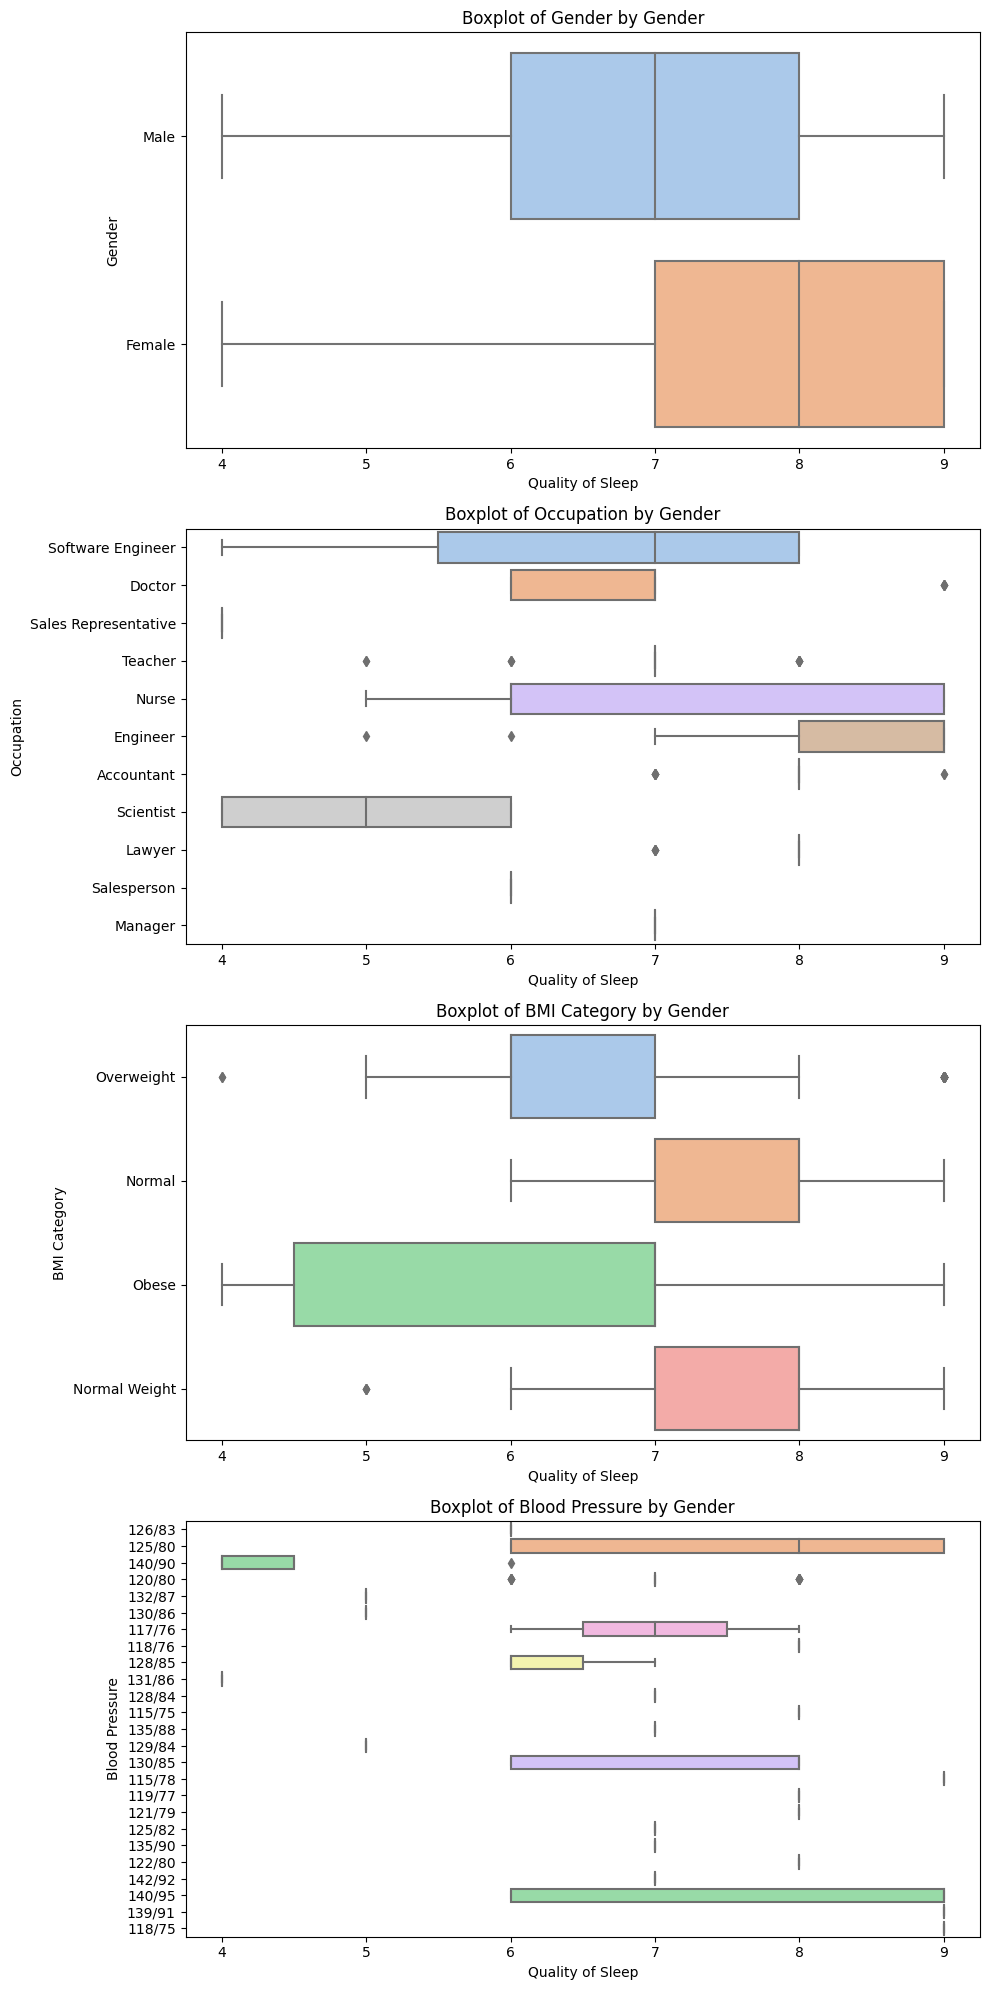

In [34]:
plt.figure(figsize=(10, len(categorical_cols) * 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.boxplot(x=df["Quality of Sleep"], y=df[col], palette="pastel")
    plt.title(f"Boxplot of {col} by {categorical_cols[0]}")
plt.tight_layout()
plt.show()

**chi square test(categorical V/s categorical analysis)**

In [35]:
cat_features = list(categorical_cols)
cat_pairs = [(cat_features[i], cat_features[j]) for i in range(len(cat_features)) for j in range(i+1, len(cat_features))]
for i, (col1, col2) in enumerate(cat_pairs, 1):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test: p-value = {p}")

Chi-Square Test: p-value = 4.400429199364931e-53
Chi-Square Test: p-value = 7.921423773487697e-13
Chi-Square Test: p-value = 4.29313183325813e-42
Chi-Square Test: p-value = 2.1523448435239855e-67
Chi-Square Test: p-value = 1.820526889548914e-263
Chi-Square Test: p-value = 2.606468888397383e-140
